# Давидян Б.А. ИУ5-62Б Рубежный контроль №2
Методы построения моделей машинного обучения.  

Датасет: https://www.kaggle.com/datasets/carlolepelaars/toy-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 1. Загрузка данных
Используем датасет Boston Housing из CSV-файла.

In [2]:
df = pd.read_csv('data/toy_dataset.csv')
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


## 2. Предварительная обработка данных
Проверим пропуски, при необходимости заполним их.
В датасете нет категориальных признаков, все числовые.

In [4]:
print(df['City'].unique(), '\n\n', df['Gender'].unique(), '\n\n', df['Illness'].unique())

['Dallas' 'New York City' 'Los Angeles' 'Mountain View' 'Boston'
 'Washington D.C.' 'San Diego' 'Austin'] 

 ['Male' 'Female'] 

 ['No' 'Yes']


In [5]:
# заменяем категориальные признаки числами

city_mapping = {
    'Dallas': 0,
    'New York City': 1,
    'Los Angeles': 2,
    'Mountain View': 3,
    'Boston': 4,
    'Washington D.C.': 5,
    'San Diego': 6,
    'Austin': 7
}

gender_mapping = {'Male': 0, 'Female': 1}
illness_mapping = {'No': 0, 'Yes': 1}

df['City'] = df['City'].map(city_mapping)
df['Gender'] = df['Gender'].map(gender_mapping)
df['Illness'] = df['Illness'].map(illness_mapping)

In [6]:
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,0,0,41,40367.0,0
1,2,0,0,54,45084.0,0
2,3,0,0,42,52483.0,0
3,4,0,0,40,40941.0,0
4,5,0,0,46,50289.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  int64  
 2   Gender   150000 non-null  int64  
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 6.9 MB


## 3. Разделение на обучающую и тестовую выборки

In [8]:
y = df['Illness']
X = df.drop('Illness', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

## 4. Масштабирование признаков
SVR чувствителен к масштабу, масштабируем данные.

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Обучение моделей

In [10]:
from sklearn.impute import SimpleImputer

#Импутация пропусков на тренировочной выборке
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)    # обучаем на тренировочных данных
X_test_imputed  = imputer.transform(X_test)         # применяем к тестовым

#Масштабирование (только для SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled  = scaler.transform(X_test_imputed)

#Обучение SVR
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

# Обучение Random Forest 
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_imputed, y_train)

RandomForestRegressor(random_state=42)

## 6. Оценка качества моделей
Используем метрики:
- R² (коэффициент детерминации).
- MAE (Mean Absolute Error).
- RMSE (Root Mean Squared Error).

In [11]:
#Предсказания
y_pred_svr = svr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)

#Функция для вычисления метрик
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

metrics_svr = evaluate(y_test, y_pred_svr)
metrics_rf = evaluate(y_test, y_pred_rf)

#Вывод результатов
results = pd.DataFrame([
    ['SVR'] + list(metrics_svr),
    ['Random Forest'] + list(metrics_rf)
], columns=['Модель', 'MAE', 'RMSE', 'R2'])
results

/Users/belladavidyan/Documents/TMO_Labs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,Модель,MAE,RMSE,R2
0,SVR,0.163357,0.270897,-0.005894
1,Random Forest,0.156350,0.281375,-0.085207


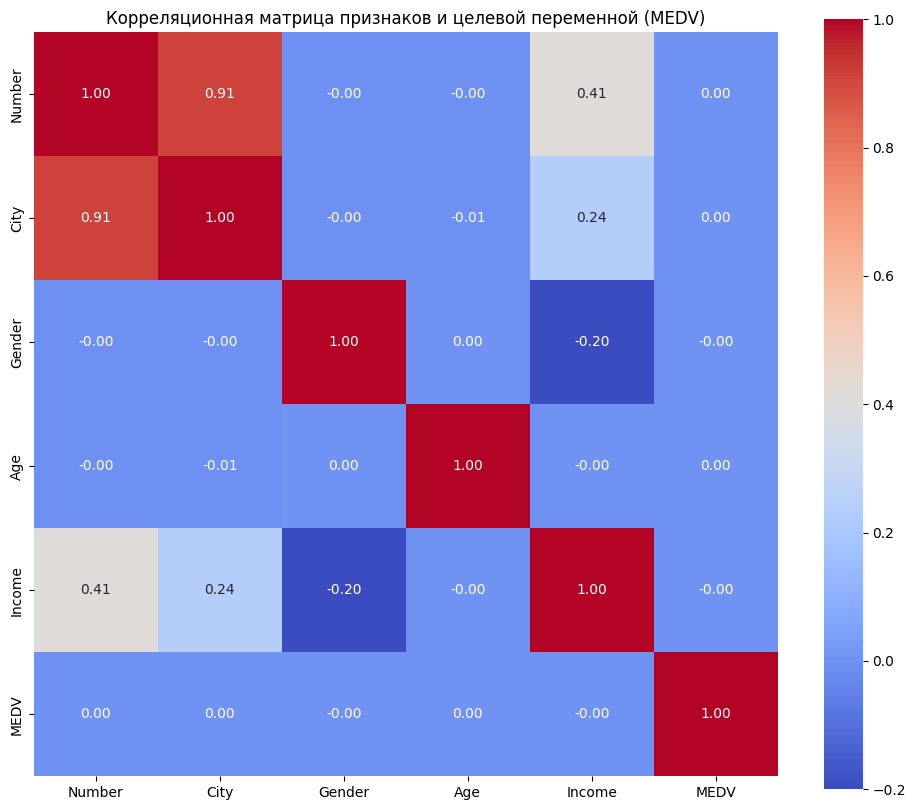

In [12]:

X_imputed_df = pd.DataFrame(X_train_imputed, columns=X.columns)

df_corr = X_imputed_df.copy()
df_corr['MEDV'] = y_train.reset_index(drop=True)

#корреляционная матрица
corr_matrix = df_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Корреляционная матрица признаков и целевой переменной (MEDV)")
plt.show()

## 7. Выводы
- **Почему выбраны эти метрики?**
  - R² показывает долю дисперсии, объясненную моделью.
  - MAE и RMSE дают представление о среднем размере ошибок в тех же единицах, что и целевая переменная.

- **Сравнение моделей:**
  - Если у одной модели выше R² и ниже MAE/RMSE, она лучше предсказывает.
  - Часто RMSE более чувствителен к крупным ошибкам, MAE — менее.

- **Рекомендации:**
  - Для данной задачи лучше всего себя показала модель случайный лес.
  - Для улучшения качества можно подобрать гиперпараметры, добавить новые признаки или использовать другие алгоритмы.